Initial Portfolio Value : 10,000,000 KRW
Final Portfolio Value   : 12,925,000 KRW


<IPython.core.display.Javascript object>


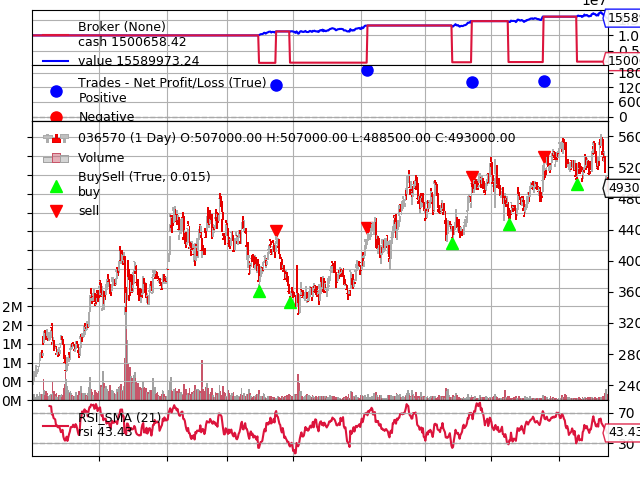

[[<Figure size 640x480 with 5 Axes>]]

In [1]:
from datetime import datetime
import backtrader as bt

class MyStrategy(bt.Strategy):  # ①
    def __init__(self):
        self.rsi = bt.indicators.RSI(self.data.close)  # ②
    def next(self):  # ③
        if not self.position:
            if self.rsi < 30:
                self.order = self.buy()
        else:
            if self.rsi > 70:
                self.order = self.sell()

cerebro = bt.Cerebro()  # ④
cerebro.addstrategy(MyStrategy)
data = bt.feeds.YahooFinanceData(dataname='036570.KS',  # ⑤
    fromdate=datetime(2017, 1, 1), todate=datetime(2019, 12, 1))
cerebro.adddata(data)
cerebro.broker.setcash(10000000)  # ⑥
cerebro.addsizer(bt.sizers.SizerFix, stake=30)  # ⑦

print(f'Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW')
cerebro.run()  # ⑧
print(f'Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW')
cerebro.plot()  # ⑨

Initial Portfolio Value : 10,000,000 KRW
[2018-03-02] BUY  : 주가 370,000, 수량 24, 수수료 12,432, 자산 10,083,568
[2018-04-02] SELL : 주가 425,000, 수량 -24, 수수료 14,280, 자산 11,293,288
[2018-04-25] BUY  : 주가 358,000, 수량 28, 수수료 14,150, 자산 11,166,205
[2018-09-13] SELL : 주가 427,000, 수량 -28, 수수료 16,878, 자산 13,210,352
[2019-02-22] BUY  : 주가 444,000, 수량 27, 수수료 16,645, 자산 12,832,207
[2019-03-29] SELL : 주가 498,000, 수량 -27, 수수료 18,669, 자산 14,621,035
[2019-06-04] BUY  : 주가 467,500, 수량 28, 수수료 18,522, 자산 14,305,377
[2019-08-05] SELL : 주가 520,000, 수량 -28, 수수료 20,602, 자산 16,067,598
[2019-10-07] BUY  : 주가 509,000, 수량 29, 수수료 20,365, 자산 16,104,390
Final Portfolio Value   : 15,589,973 KRW


<IPython.core.display.Javascript object>


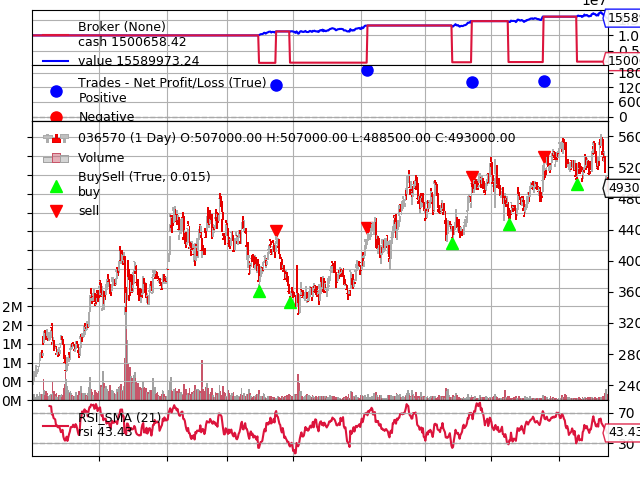

[[<Figure size 640x480 with 5 Axes>]]

In [1]:
import backtrader as bt
from datetime import datetime

class MyStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None        
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)

    def notify_order(self, order):  # ①
        if order.status in [order.Submitted, order.Accepted]:
            return
        if order.status in [order.Completed]:  # ② 
            if order.isbuy():
                self.log(f'BUY  : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '        
                    f'자산 {cerebro.broker.getvalue():,.0f}') 
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else: 
                self.log(f'SELL : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '
                    f'자산 {cerebro.broker.getvalue():,.0f}') 
            self.bar_executed = len(self)
        elif order.status in [order.Canceled]:
            self.log('ORDER CANCELD')
        elif order.status in [order.Margin]:
            self.log('ORDER MARGIN')
        elif order.status in [order.Rejected]:
            self.log('ORDER REJECTED')
        self.order = None

    def next(self):
        if not self.position:
            if self.rsi < 30:
                self.order = self.buy()
        else:
            if self.rsi > 70:
                self.order = self.sell()

    def log(self, txt, dt=None):  # ③ 
        dt = self.datas[0].datetime.date(0)
        print(f'[{dt.isoformat()}] {txt}')

cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)
data = bt.feeds.YahooFinanceData(dataname='036570.KS',
    fromdate=datetime(2017, 1, 1), todate=datetime(2019, 12, 1))
cerebro.adddata(data)
cerebro.broker.setcash(10000000)
cerebro.broker.setcommission(commission=0.0014)  # ④
cerebro.addsizer(bt.sizers.PercentSizer, percents=90)  # ⑤

print(f'Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW')
cerebro.run()
print(f'Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW')
cerebro.plot(style='candlestick')  # ⑥